In [30]:
#Importing required libraries.
#You dont need to import matplotlib, i just used to to create the graphs
import gym
import random
import numpy as np
from IPython.display import clear_output
import math
import matplotlib.pyplot as plt

In [12]:
#Q learning training, followed the tutorial at https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/
#Values for q learning
alpha = 0.1
gamma = 0.6
epsilon = 0.1
#Stores timesteps and penalties
all_epochs = []
all_penalties = []

#Create env and q table
env = gym.make("Taxi-v3")
q_table = np.zeros([env.observation_space.n, env.action_space.n])
env.reset()
env.render()

#For 100000 episodes
for i in range(1, 100001):
    state = env.reset()
    priorReward = 0
    epochs, penalties, reward, = 0, 0, 0
    done = False
    #While episode not done
    while not done:
        #Exploit learnt value or choose random value depending on epsilon. Epsilon value goes down over time to encourage exploring in the early stages
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)
        
        #Updated q table values
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        
        #Decrease epsilon
        if epsilon > 0.05:
            if reward > priorReward and i > 16666:
                epsilon = math.pow(0.99555, i - 16666)
        
        state = next_state
        priorReward = reward
        epochs += 1
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



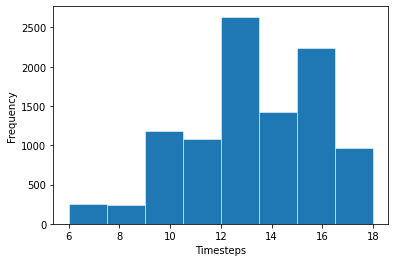

Results after 10000 episodes:
Average timesteps per episode: 13.1
Average penalties per episode: 0.0


In [46]:
#Run after training
#Q learning agent after training
total_epochs, total_penalties = 0, 0
episodes = 10000
runs = []
#For 10000 episodes
for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    done = False
    #While episode not done
    while not done:
        #Exploit learnt action
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        
        if reward == -10:
            penalties += 1

        epochs += 1
    #Increase penalities and timesteps if neccessary
    total_penalties += penalties
    total_epochs += epochs
    runs.append(epochs)
#fig, ax = plt.subplots()
#ax.hist(runs, bins=8, linewidth=0.5, edgecolor="white")
#ax.set(ylabel = "Frequency", xlabel = "Timesteps")
#plt.show()
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Episode: 10000
Results after 10001 episodes:
Average timesteps per episode: 196.7018298170183
Average penalties per episode: 63.94780521947805


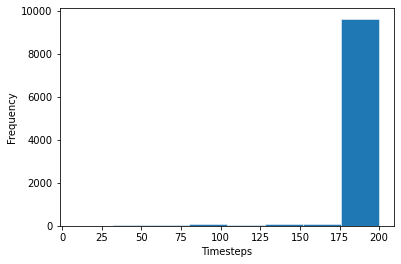

In [45]:
#TD learning agent training
def TDTaxi():
    #TD learning values
    epsilon = 1
    epsilonDecay = 0.99555
    epsilonDecayDelay = 0.166
    learningRate = 0.1
    discount = 0.95
    alpha = 0.1
    gamma = 0.6
    reward = 0
    bestReward = -1000000
    oldValue = 0
    
    #Create environment
    env = gym.make("Taxi-v3")
    env.reset()
    env.render()
    #Create v table
    v = np.zeros((env.observation_space.n, env.action_space.n))
    #For 10000 episodes
    for i in range(1, 10001):
        
        prevState = env.reset()
        reward = 0
        done = False
        priorReward = 0
        #While episode not done
        while not done:
            #Exploit learnt value or choose random. Works better than just choosing a random value
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(v[state])

            nextState, reward, done, _ = env.step(action)

            
            #Update V table
            v[prevState] = v[prevState] + learningRate * (reward+discount*(v[nextState]) - v[prevState])
            prevState = nextState
            
            #decrease epsilon
            if epsilon > 0.05:
                if reward > priorReward and i > 1666:
                    epsilon = math.pow(0.99555, i - 1666)
            state = next_state
            priorReward = reward
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")
    return v
#TD learning after training   
def TDTaxiAfter(v):
    total_epochs, total_penalties = 0, 0
    episodes = 10001
    runs = []
    epsilon = 1
    #For 10000 episodes
    for i in range(episodes):
        state = env.reset()
        epochs, penalties, reward = 0, 0, 0
        done = False
        priorReward = 0
        #While episode not done
        while not done:
            #Exploit learnt values or choose random value
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(v[state])
            state, reward, done, info = env.step(action)
            #Give penalty if reward is -10
            if reward == -10:
                penalties += 1
            #Decrease epsilon
            if epsilon > 0.05:
                if reward > priorReward and i > 16666:
                    epsilon = math.pow(0.99555, i - 16666)
            epochs += 1
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")
        total_penalties += penalties
        total_epochs += epochs
        runs.append(epochs)
        priorReward = reward
    #print results from run
    print(f"Results after {episodes} episodes:")
    print(f"Average timesteps per episode: {total_epochs / episodes}")
    print(f"Average penalties per episode: {total_penalties / episodes}")
    return runs
    
#For graphing purposes
v = TDTaxi()
runs = TDTaxiAfter(v)

In [44]:
#This part is just for making graphs
#runs = TDTaxiAfter(v)
#fig, ax = plt.subplots()
#ax.hist(runs, bins=8, linewidth=0.5, edgecolor="white")
#ax.set(ylabel = "Frequency", xlabel = "Timesteps")
#plt.show()

Episode: 3200
4
5
5
2
2
4
1
0
3
1
2
2
3
2
4
2
0
5
2
4
0
1
5
5
0
3
4
5
0
5
5
4
3
3
0
0
4
2
0
3
5
2
4
5
4
2
3
5
3
5
5
0
5
5
5
4
4
4
4
3
5
5
0
2
0
0
4
0
5
5
2
5
2
4
2
3
1
0
3
2
5
4
5
4
3
4
4
0
4
1
2
4
2
3
5
5
5
0
2
1
4
2
4
5
4
0
0
3
0
5
2
1
2
3
2
0
2
0
3
2
2
3
1
5
4
4
1
2
2
3
1
4
1
1
4
2
5
5
0
1
5
0
1
0
5
2
1
4
5
0
1
4
0
1
0
0
3
2
5
3
5
3
1
1
0
3
3
4
1
0
1
0
0
4
4
2
3
5
3
5
4
3
5
4
1
1
0
0
3
0
2
2
5
3
0
0
0
4
0
2
2
5
5
1
5
4
5
0
4
2
4
5
5
0
0
3
2
1
2
5
4
0
5
3
2
4
4
3
0
1
5
2
2
3
2
2
4
5
1
3
0
4
4
0
5
3
4
1
0
4
0
1
3
0
5
0
1
0
0
3
4
2
5
1
0
1
3
2
3
1
3
4
5
3
5
2
0
2
1
5
0
3
3
3
0
5
4
5
5
5
5
2
0
4
2
0
4
1
1
5
4
5
3
1
3
1
5
1
3
0
0
4
5
2
4
2
0
4
5
1
0
1
1
4
0
0
1
0
5
5
3
5
4
4
4
2
5
3
0
2
4
2
0
3
2
2
0
2
2
2
0
5
1
1
4
3
2
2
1
0
4
2
3
0
4
3
4
3
2
2
0
5
3
2
3
4
0
5
0
0
2
1
2
5
2
4
5
5
3
1
2
4
2
2
4
0
0
2
2
2
2
4
4
4
0
4
1
0
4
4
2
1
3
3
2
1
1
3
0
0
5
5
3
1
0
2
5
5
1
2
1
3
3
2
2
5
1
5
3
0
3
0
5
3
1
4
2
1
3
0
4
4
2
5
1
3
0
4
5
4
5
5
1
2
3
0
0
0
4
3
3
0
1
0
2
3
1
3
5
2
5
1
0
2
0
4
5
2
5
1
1
1
1


3
3
5
5
5
5
5
3
2
2
0
2
3
1
0
3
3
2
3
0
4
5
0
2
0
3
4
0
4
4
0
4
1
3
2
1
2
1
5
5
0
2
3
4
1
2
5
0
3
5
4
0
1
3
0
2
5
1
0
3
4
0
1
2
5
4
5
0
4
1
1
5
3
5
2
3
4
4
4
4
3
3
3
3
5
4
4
3
3
3
0
0
0
2
3
3
5
0
0
5
5
2
1
3
0
1
1
0
3
5
4
4
4
3
1
2
0
3
1
2
1
5
4
4
2
2
2
4
4
4
3
4
0
1
4
0
1
5
4
1
1
1
0
2
3
3
5
1
5
0
2
5
3
5
3
3
4
0
1
4
2
0
2
5
1
3
2
2
2
5
0
4
5
5
0
4
1
5
0
3
5
3
0
3
4
5
4
5
3
4
5
5
5
3
0
4
3
5
5
0
3
2
4
0
2
5
2
0
1
1
0
3
3
5
5
1
3
5
2
5
2
0
5
0
1
2
1
0
1
2
3
0
5
1
3
4
0
2
1
0
4
5
0
1
0
2
1
4
5
3
3
2
5
5
4
0
1
0
0
1
4
3
2
5
3
3
3
2
1
3
0
1
1
4
2
4
0
3
1
0
0
4
5
4
3
4
2
4
5
0
2
4
0
3
1
4
0
1
1
2
5
5
0
0
5
4
4
3
0
1
2
1
0
4
3
4
3
2
3
1
5
1
0
0
2
1
0
0
4
1
2
2
1
2
5
2
1
4
2
0
4
3
5
0
4
5
3
3
1
3
1
3
5
1
2
2
0
0
4
0
3
1
3
5
3
3
5
5
5
3
4
0
2
1
4
1
2
5
3
3
3
2
3
5
4
5
1
2
5
1
5
0
5
1
4
4
2
1
3
1
2
0
0
0
5
3
1
5
5
4
0
5
4
1
4
4
2
0
0
0
4
2
4
3
3
3
5
1
1
5
0
4
2
5
1
0
4
1
1
1
4
3
3
5
5
2
0
1
3
1
5
4
2
0
0
3
2
5
2
2
0
1
0
4
3
5
2
4
2
5
0
1
2
1
2
4
0
5
3
1
0
1
0
5
5
4
1
0
5
5
0
5
2
2
3
2
0
3
3
5


KeyboardInterrupt: 